# for the dataset hatespeech

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Training my Naive Bayes model...
Best settings for Naive Bayes: {'classifier__alpha': 0.1}
Best F1 score while training: 0.4021657330687651
Final F1 score for class 1 with Naive Bayes: 0.3524590163934426

Here’s the full report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76       309
           1       0.45      0.29      0.35       148

    accuracy                           0.65       457
   macro avg       0.58      0.56      0.56       457
weighted avg       0.62      0.65      0.63       457


Training my SVM model...
Best settings for SVM: {'classifier__C': 1}
Best F1 score while training: 0.511416061680686
Final F1 score for class 1 with SVM: 0.4709480122324159

Here’s the full report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.71       309
           1       0.43      0.52      0.47       148

    accuracy                           0.62       457
   macro avg       0.59 

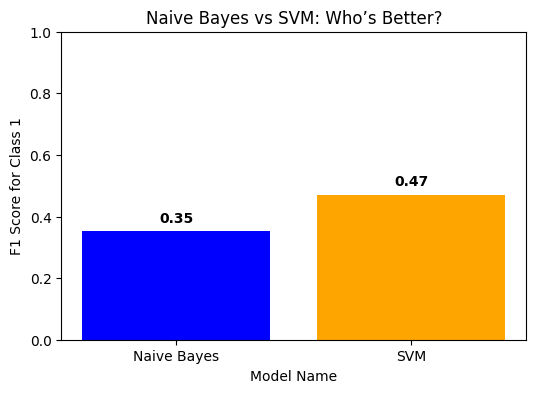

In [1]:
# Importing stuff we need

import pandas as pd
import re
import nltk
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

# here i have downloaded stopwords (like a dictionary of common words)

nltk.download("stopwords")

# here i am loading my data files

train_file = "train.csv"
val_file = "val.csv"

train_data = pd.read_csv(train_file)
val_data = pd.read_csv(val_file)

# here i am doing the data preprocessing

def clean_my_text(text):
    text = text.lower()  # here i have make everything small letters
    text = re.sub(r'[^\w\s]', '', text)  #here i have remove weird symbols
    text = re.sub(r'\s+', ' ', text).strip()  #here i have fix extra spaces
    return text

# Making a list of words to ignore

stop_words = set(stopwords.words("english"))
my_stop_words = stop_words.union({"ka", "hai", "ke", "ki", "ko", "se", "bhi", "toh", "hi", "bhai", "nhi", "kr", "kya"})

def remove_junk_words(text):
    words = text.split()
    clean_words = [word for word in words if word not in my_stop_words]
    return " ".join(clean_words)

# Cleaning the sentences in my data

train_data["Sentence"] = train_data["Sentence"].apply(clean_my_text).apply(remove_junk_words)
val_data["Sentence"] = val_data["Sentence"].apply(clean_my_text).apply(remove_junk_words)


# Setting up my folding thing

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# My two models and their settings

myModels = {
    "Naive Bayes": (MultinomialNB(), {'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}),
    "SVM": (SVC(kernel="linear", class_weight='balanced'), {'classifier__C': [0.1, 1, 10, 100]})
}
# here i will train and check models

model_scores = {}

for model_name, (model, settings) in myModels.items():
    print(f"\nTraining my {model_name} model...")
    
    # here i am making a pipeline (like a conveyor belt for data)
    
    my_pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=2, max_df=0.95)),  
        ('classifier', model)
    ])

    # here i am finding the best settings with folding
    
    grid = GridSearchCV(my_pipeline, settings, scoring='f1', cv=folds, n_jobs=-1)
    grid.fit(train_data["Sentence"], train_data["Tag"])

    # here i am Showing the best stuff I found
    
    print(f"Best settings for {model_name}:", grid.best_params_)
    print(f"Best F1 score while training: {grid.best_score_}")

    # here i am testing on my validation data
    
    best_model = grid.best_estimator_
    predictions = best_model.predict(val_data["Sentence"])
    report = classification_report(val_data["Tag"], predictions, output_dict=True)
    # here i am getting score for class 1
    
    class_1_score = report['1']['f1-score'] 
    model_scores[model_name] = class_1_score
    
    print(f"Final F1 score for class 1 with {model_name}:", class_1_score)
    print("\nHere’s the full report:\n", classification_report(val_data["Tag"], predictions))

#Here I have making a bar graph to compare f1 score for positive class

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
bars = plt.bar(model_scores.keys(), model_scores.values(), color=['blue', 'orange'])

plt.xlabel("Model Name")
plt.ylabel("F1 Score for Class 1")
plt.title("Naive Bayes vs SVM: Who’s Better?")
plt.ylim(0, 1)

# Adding F1 scores on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
             bar.get_height() + 0.02,  # Y-coordinate (a bit above the bar)
             f"{bar.get_height():.2f}",  # F1 score rounded to 2 decimal places
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


# for the dataset humor

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Training my Naive Bayes model...
Best settings for Naive Bayes: {'classifier__alpha': 2.0}
Best F1 score while training: 0.7448473036912693
Final F1 score for class 1 with Naive Bayes: 0.7604395604395604

Here’s the full report:
               precision    recall  f1-score   support

           0       0.81      0.11      0.19       119
           1       0.62      0.98      0.76       176

    accuracy                           0.63       295
   macro avg       0.72      0.55      0.48       295
weighted avg       0.70      0.63      0.53       295


Training my SVM model...
Best settings for SVM: {'classifier__C': 1}
Best F1 score while training: 0.6501473896923718
Final F1 score for class 1 with SVM: 0.7

Here’s the full report:
               precision    recall  f1-score   support

           0       0.55      0.51      0.53       119
           1       0.68      0.72      0.70       176

    accuracy                           0.63       295
   macro avg       0.62      0.61     

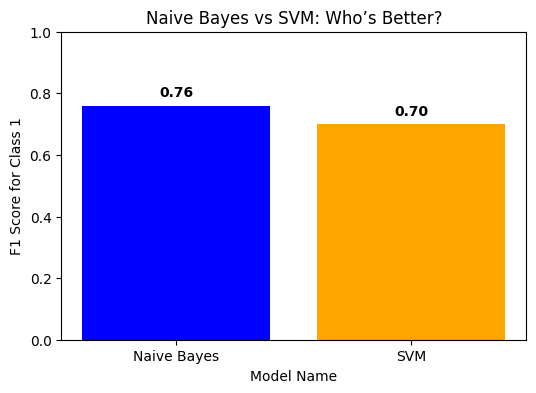

In [2]:
# Importing stuff we need

import pandas as pd
import re
import nltk
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

# here i have downloaded stopwords (like a dictionary of common words)

nltk.download("stopwords")

# here i am loading my data files

train_file = "humor_train.csv"
val_file = "humor_val.csv"

train_data = pd.read_csv(train_file)
val_data = pd.read_csv(val_file)

# here i am doing the data preprocessing

def clean_my_text(text):
    text = text.lower()  # here i have make everything small letters
    text = re.sub(r'[^\w\s]', '', text)  #here i have remove weird symbols
    text = re.sub(r'\s+', ' ', text).strip()  #here i have fix extra spaces
    return text

# Making a list of words to ignore

stop_words = set(stopwords.words("english"))
my_stop_words = stop_words.union({"ka", "hai", "ke", "ki", "ko", "se", "bhi", "toh", "hi", "bhai", "nhi", "kr", "kya"})

def remove_junk_words(text):
    words = text.split()
    clean_words = [word for word in words if word not in my_stop_words]
    return " ".join(clean_words)

# Cleaning the sentences in my data

train_data["Sentence"] = train_data["Sentence"].apply(clean_my_text).apply(remove_junk_words)
val_data["Sentence"] = val_data["Sentence"].apply(clean_my_text).apply(remove_junk_words)


# Setting up my folding thing

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# My two models and their settings

myModels = {
    "Naive Bayes": (MultinomialNB(), {'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}),
    "SVM": (SVC(kernel="linear", class_weight='balanced'), {'classifier__C': [0.1, 1, 10, 100]})
}
# here i will train and check models

model_scores = {}

for model_name, (model, settings) in myModels.items():
    print(f"\nTraining my {model_name} model...")
    
    # here i am making a pipeline (like a conveyor belt for data)
    
    my_pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=2, max_df=0.95)),  
        ('classifier', model)
    ])

    # here i am finding the best settings with folding
    
    grid = GridSearchCV(my_pipeline, settings, scoring='f1', cv=folds, n_jobs=-1)
    grid.fit(train_data["Sentence"], train_data["Tag"])

    # here i am Showing the best stuff I found
    
    print(f"Best settings for {model_name}:", grid.best_params_)
    print(f"Best F1 score while training: {grid.best_score_}")

    # here i am testing on my validation data
    
    best_model = grid.best_estimator_
    predictions = best_model.predict(val_data["Sentence"])
    report = classification_report(val_data["Tag"], predictions, output_dict=True)
    # here i am getting score for class 1
    
    class_1_score = report['1']['f1-score'] 
    model_scores[model_name] = class_1_score
    
    print(f"Final F1 score for class 1 with {model_name}:", class_1_score)
    print("\nHere’s the full report:\n", classification_report(val_data["Tag"], predictions))

#Here I have making a bar graph to compare f1 score for positive class

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
bars = plt.bar(model_scores.keys(), model_scores.values(), color=['blue', 'orange'])

plt.xlabel("Model Name")
plt.ylabel("F1 Score for Class 1")
plt.title("Naive Bayes vs SVM: Who’s Better?")
plt.ylim(0, 1)

# Adding F1 scores on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
             bar.get_height() + 0.02,  # Y-coordinate (a bit above the bar)
             f"{bar.get_height():.2f}",  # F1 score rounded to 2 decimal places
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


# For the dataset Sarcasm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Training my Naive Bayes model...
Best settings for Naive Bayes: {'classifier__alpha': 0.1}
Best F1 score while training: 0.2079439089652154
Final F1 score for class 1 with Naive Bayes: 0.2033898305084746

Here’s the full report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       474
           1       0.75      0.12      0.20        51

    accuracy                           0.91       525
   macro avg       0.83      0.56      0.58       525
weighted avg       0.90      0.91      0.88       525


Training my SVM model...
Best settings for SVM: {'classifier__C': 0.1}
Best F1 score while training: 0.7665300463715206
Final F1 score for class 1 with SVM: 0.8135593220338984

Here’s the full report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       474
           1       0.72      0.94      0.81        51

    accuracy                           0.96       525
   macro avg       0.

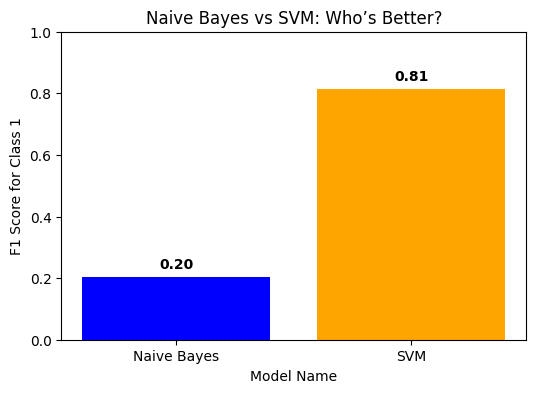

In [3]:
# Importing stuff we need

import pandas as pd
import re
import nltk
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

# here i have downloaded stopwords (like a dictionary of common words)

nltk.download("stopwords")

# here i am loading my data files

train_file = "sarcasm_train.csv"
val_file = "sarcasm_val.csv"

train_data = pd.read_csv(train_file)
val_data = pd.read_csv(val_file)

# here i am doing the data preprocessing

def clean_my_text(text):
    text = text.lower()  # here i have make everything small letters
    text = re.sub(r'[^\w\s]', '', text)  #here i have remove weird symbols
    text = re.sub(r'\s+', ' ', text).strip()  #here i have fix extra spaces
    return text

# Making a list of words to ignore

stop_words = set(stopwords.words("english"))
my_stop_words = stop_words.union({"ka", "hai", "ke", "ki", "ko", "se", "bhi", "toh", "hi", "bhai", "nhi", "kr", "kya"})

def remove_junk_words(text):
    words = text.split()
    clean_words = [word for word in words if word not in my_stop_words]
    return " ".join(clean_words)

# Cleaning the sentences in my data

train_data["Sentence"] = train_data["Sentence"].apply(clean_my_text).apply(remove_junk_words)
val_data["Sentence"] = val_data["Sentence"].apply(clean_my_text).apply(remove_junk_words)


# Setting up my folding thing

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# My two models and their settings

myModels = {
    "Naive Bayes": (MultinomialNB(), {'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}),
    "SVM": (SVC(kernel="linear", class_weight='balanced'), {'classifier__C': [0.1, 1, 10, 100]})
}
# here i will train and check models

model_scores = {}

for model_name, (model, settings) in myModels.items():
    print(f"\nTraining my {model_name} model...")
    
    # here i am making a pipeline (like a conveyor belt for data)
    
    my_pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=2, max_df=0.95)),  
        ('classifier', model)
    ])

    # here i am finding the best settings with folding
    
    grid = GridSearchCV(my_pipeline, settings, scoring='f1', cv=folds, n_jobs=-1)
    grid.fit(train_data["Sentence"], train_data["Tag"])

    # here i am Showing the best stuff I found
    
    print(f"Best settings for {model_name}:", grid.best_params_)
    print(f"Best F1 score while training: {grid.best_score_}")

    # here i am testing on my validation data
    
    best_model = grid.best_estimator_
    predictions = best_model.predict(val_data["Sentence"])
    report = classification_report(val_data["Tag"], predictions, output_dict=True)
    # here i am getting score for class 1
    
    class_1_score = report['1']['f1-score'] 
    model_scores[model_name] = class_1_score
    
    print(f"Final F1 score for class 1 with {model_name}:", class_1_score)
    print("\nHere’s the full report:\n", classification_report(val_data["Tag"], predictions))

#Here I have making a bar graph to compare f1 score for positive class

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
bars = plt.bar(model_scores.keys(), model_scores.values(), color=['blue', 'orange'])

plt.xlabel("Model Name")
plt.ylabel("F1 Score for Class 1")
plt.title("Naive Bayes vs SVM: Who’s Better?")
plt.ylim(0, 1)

# Adding F1 scores on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
             bar.get_height() + 0.02,  # Y-coordinate (a bit above the bar)
             f"{bar.get_height():.2f}",  # F1 score rounded to 2 decimal places
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


# Sequence Labeling Task:

In [4]:
import numpy as np
from collections import defaultdict, Counter

# This function reads a file and splits each word/tag pair.
def readfile(fname):
    sentences = []  # list of sentences
    with open(fname, 'r') as f:
        for line in f:
            parts = line.strip().split()  # split by space
            # Each part is like "word/tag", so we split it into (word, tag)
            sent = [tuple(x.rsplit('/', 1)) for x in parts]
            sentences.append(sent)
    return sentences

# Read our data files, lol!
trainy = readfile("train_data.txt")       # training data
testy = readfile("test_data.txt")         # test data
noisy_testy = readfile("noisy_test_data.txt")  # noisy data

# Let's count how many times we see transitions and words.
# "trans" counts tag-to-tag moves, "emit" counts tag to word emissions.
trans = defaultdict(Counter)
emit = defaultdict(Counter)
tag_total = Counter()

for sent in trainy:
    prev_tag = "<s>"  # starting tag
    for word, tag in sent:
        trans[prev_tag][tag] += 1   # count tag transition
        emit[tag][word] += 1        # count word for a tag
        tag_total[tag] += 1         # count tag occurrence
        prev_tag = tag

# Now we change counts to probabilities.
trans_prob = {prev: {tag: count / sum(tags.values())
                     for tag, count in tags.items()}
              for prev, tags in trans.items()}

emit_prob = {tag: {word: count / sum(words.values())
                    for word, count in words.items()}
             for tag, words in emit.items()}

# Get all tag names in a list
tags_list = list(tag_total.keys())

# Viterbi algorithm to predict tags for a sentence, cool huh?
def viterbi(sent, trans_prob, emit_prob, tags_list, noisy=False):
    n = len(sent)
    V = np.zeros((len(tags_list), n))
    back = np.zeros((len(tags_list), n), dtype=int)
    
    # For the first word
    for i, tag in enumerate(tags_list):
        # If word not seen, use a tiny probability (1e-6) or handle noisy data
        word_prob = emit_prob.get(tag, {}).get(sent[0], 1e-6 if not noisy else 1.0 / (len(emit_prob.get(tag, {})) + 1))
        V[i, 0] = trans_prob.get('<s>', {}).get(tag, 1e-6) * word_prob

    # For the rest of the words in the sentence
    for t in range(1, n):
        for i, tag in enumerate(tags_list):
            best = 0
            best_i = 0
            for j, prev_tag in enumerate(tags_list):
                trans_p = trans_prob.get(prev_tag, {}).get(tag, 1e-6)  # tiny if not seen
                word_prob = emit_prob.get(tag, {}).get(sent[t], 1e-6 if not noisy else 1.0 / (len(emit_prob.get(tag, {})) + 1))
                prob = V[j, t-1] * trans_p * word_prob
                if prob > best:
                    best = prob
                    best_i = j
            V[i, t] = best
            back[i, t] = best_i

    # Backtracking to get the best tag path
    best_path = []
    best_state = np.argmax(V[:, n-1])
    for t in range(n-1, -1, -1):
        best_path.insert(0, tags_list[best_state])
        best_state = back[best_state, t]
    
    # Return words with predicted tags
    return list(zip(sent, best_path))

# Evaluate our tagger on some data
def evaly(data, trans_prob, emit_prob, tags_list, noisy=False):
    right = 0
    total = 0
    for sent in data:
        words, true_tags = zip(*sent)
        # Get predicted tags for the sentence
        pred = [tag for _, tag in viterbi(words, trans_prob, emit_prob, tags_list, noisy)]
        for pt, tt in zip(pred, true_tags):
            if pt == tt:
                right += 1
            total += 1
    return right / total

# Let's check our accuracies, yay!
acc_test = evaly(testy, trans_prob, emit_prob, tags_list)
acc_noisy = evaly(noisy_testy, trans_prob, emit_prob, tags_list)
acc_noisy_noise = evaly(noisy_testy, trans_prob, emit_prob, tags_list, noisy=True)

print("Baseline Viterbi Accuracy:", round(acc_test, 4))
print("Noisy Data Baseline Accuracy:", round(acc_noisy, 4))
print("Noisy Data (with Noise Handling) Accuracy:", round(acc_noisy_noise, 4))


Baseline Viterbi Accuracy: 0.8966
Noisy Data Baseline Accuracy: 0.8132
Noisy Data (with Noise Handling) Accuracy: 0.1533
